In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [ ]:
model_path = "/content/drive/MyDrive/COVID_XRay_Project/final_covid_model.h5"
model = load_model(model_path)
print("Modele charge :", model_path)
print("Resume du modele :")
model.summary()

Modele charge : /content/drive/MyDrive/COVID_XRay_Project/final_covid_model.h5
Resume du modele :


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 200, 200,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 206, 206,  │          0 │ input_layer_3[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 100, 100,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 100, 100,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 100, 100,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 102, 102,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 50, 50,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 50, 50,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 50, 50,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 50, 50,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 50, 50,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 50, 50,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 50, 50,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 50, 50,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 50, 50,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 50, 50,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 50, 50,    │      1,024 │ conv2_block1_3_c

 Total params: 24,771,973 (94.50 MB)

 Trainable params: 10,114,051 (38.58 MB)

 Non-trainable params: 14,657,920 (55.92 MB)

 Optimizer params: 2 (12.00 B)

In [ ]:
IMG_SIZE = (200, 200)
N_SPLITS = 5
MAX_SAMPLES = 300 #nbr images

base_dir = "/content/drive/MyDrive/COVID_XRay_Project/dataset/chest_xray"
train_dir = os.path.join(base_dir, "train")
val_dir = os.path.join(base_dir, "val")
classes = ['COVID', 'Normal', 'Viral Pneumonia']

def load_image_paths(dataset_dir, classes, max_per_class=None):
    image_paths = []
    labels = []

    for idx, class_name in enumerate(classes):
        class_path = os.path.join(dataset_dir, class_name)
        if os.path.isdir(class_path):
            images = [f for f in os.listdir(class_path)
                     if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

            if max_per_class and len(images) > max_per_class:
                images = images[:max_per_class]

            for img in images:
                image_paths.append(os.path.join(class_path, img))
                labels.append(idx)

    return np.array(image_paths), np.array(labels)

all_paths = []
all_labels = []

for dir_path in [train_dir, val_dir]:
    paths, labels = load_image_paths(dir_path, classes, MAX_SAMPLES)
    all_paths.extend(paths)
    all_labels.extend(labels)

all_paths = np.array(all_paths)
all_labels = np.array(all_labels)

print("Total images :", len(all_paths))
print("Distribution :", np.bincount(all_labels))
print("Images par classe :", MAX_SAMPLES, "max")

Total images : 1769
Distribution : [600 600 569]
Images par classe : 300 max


In [ ]:
skf = StratifiedKFold(n_splits=N_SPLITS, shuffle=True, random_state=42)

fold_results = []
all_predictions = []
all_true_labels = []

print("Debut validation croisee", N_SPLITS, "-fold avec", MAX_SAMPLES, "images par classe")

for fold, (train_idx, val_idx) in enumerate(skf.split(all_paths, all_labels)):
    print("\nFold", fold+1, "/", N_SPLITS)

    X_val = all_paths[val_idx]
    y_val = all_labels[val_idx]

    predictions = []

    for i, img_path in enumerate(X_val):
        img = load_img(img_path, target_size=IMG_SIZE)
        img_array = img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = tf.keras.applications.resnet50.preprocess_input(img_array)

        pred = model.predict(img_array, verbose=0)
        predictions.append(np.argmax(pred[0]))

        # Afficher progression toutes les 50 images
        if (i+1) % 50 == 0:
            print(f"  Traite {i+1}/{len(X_val)} images...")

    acc = accuracy_score(y_val, predictions)
    fold_results.append(acc)

    all_predictions.extend(predictions)
    all_true_labels.extend(y_val)

    print("  Accuracy :", f"{acc:.4f}")
    print("  Samples :", len(X_val), "images")
    print("  Distribution validation :", np.bincount(y_val))

print("\nValidation croisee terminee avec", MAX_SAMPLES, "images par classe")

Debut validation croisee 5 -fold avec 300 images par classe

Fold 1 / 5
  Traite 50/354 images...
  Traite 100/354 images...
  Traite 150/354 images...
  Traite 200/354 images...
  Traite 250/354 images...
  Traite 300/354 images...
  Traite 350/354 images...
  Accuracy : 0.9915
  Samples : 354 images
  Distribution validation : [120 120 114]

Fold 2 / 5
  Traite 50/354 images...
  Traite 100/354 images...
  Traite 150/354 images...
  Traite 200/354 images...
  Traite 250/354 images...
  Traite 300/354 images...
  Traite 350/354 images...
  Accuracy : 0.9661
  Samples : 354 images
  Distribution validation : [120 120 114]

Fold 3 / 5
  Traite 50/354 images...
  Traite 100/354 images...
  Traite 150/354 images...
  Traite 200/354 images...
  Traite 250/354 images...
  Traite 300/354 images...
  Traite 350/354 images...
  Accuracy : 0.9915
  Samples : 354 images
  Distribution validation : [120 120 114]

Fold 4 / 5
  Traite 50/354 images...
  Traite 100/354 images...
  Traite 150/354 ima

In [ ]:
print("\n" + "="*50)
print("RESULTATS FINAUX (300 images par classe)")
print("="*50)

print("\nAccuracy par fold :")
for i, acc in enumerate(fold_results):
    print("  Fold", i+1, ":", f"{acc:.4f}")

print(f"\nMoyenne : {np.mean(fold_results):.4f}")
print(f"Ecart-type : {np.std(fold_results):.4f}")
print(f"Max : {np.max(fold_results):.4f}")
print(f"Min : {np.min(fold_results):.4f}")

print("\nRapport de classification global :")
print(classification_report(all_true_labels, all_predictions, target_names=classes))

# Détails par classe
print("\nDetails par classe :")
for i, class_name in enumerate(classes):
    indices = [j for j, label in enumerate(all_true_labels) if label == i]
    if indices:
        class_true = [all_true_labels[j] for j in indices]
        class_pred = [all_predictions[j] for j in indices]
        class_acc = accuracy_score(class_true, class_pred)
        print(f"  {class_name}: {len(indices)} images, Accuracy: {class_acc:.4f}")


RESULTATS FINAUX (300 images par classe)

Accuracy par fold :
  Fold 1 : 0.9915
  Fold 2 : 0.9661
  Fold 3 : 0.9915
  Fold 4 : 0.9802
  Fold 5 : 0.9887

Moyenne : 0.9836
Ecart-type : 0.0097
Max : 0.9915
Min : 0.9661

Rapport de classification global :
                 precision    recall  f1-score   support

          COVID       1.00      0.98      0.99       600
         Normal       0.96      1.00      0.98       600
Viral Pneumonia       1.00      0.97      0.98       569

       accuracy                           0.98      1769
      macro avg       0.98      0.98      0.98      1769
   weighted avg       0.98      0.98      0.98      1769


Details par classe :
  COVID: 600 images, Accuracy: 0.9833
  Normal: 600 images, Accuracy: 1.0000
  Viral Pneumonia: 569 images, Accuracy: 0.9666


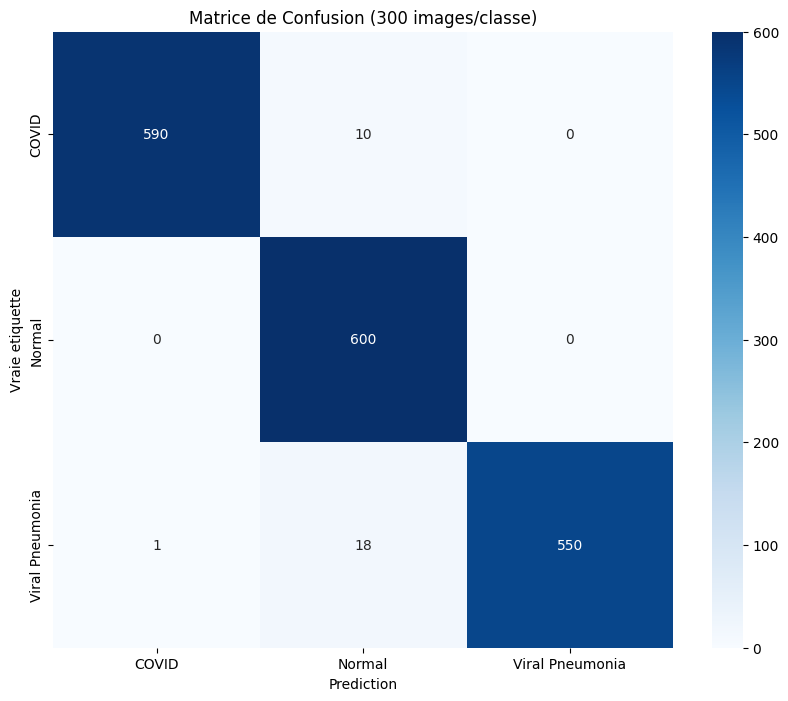

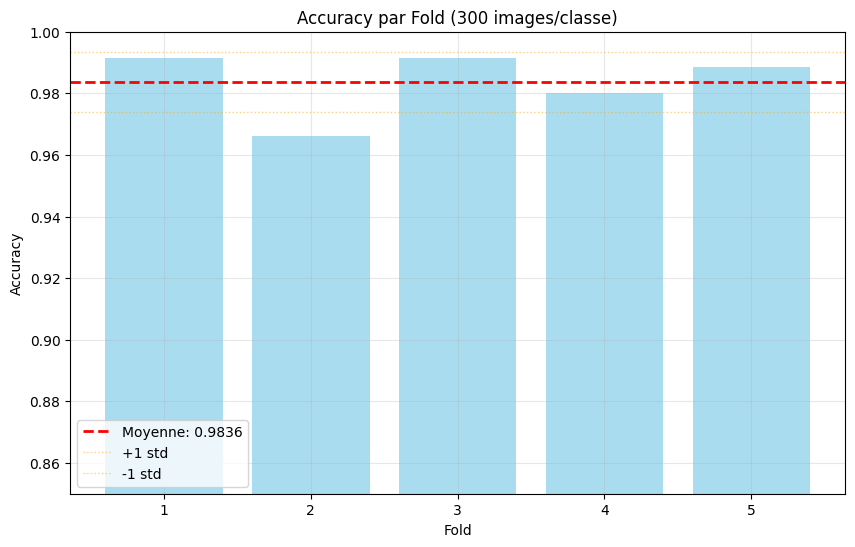

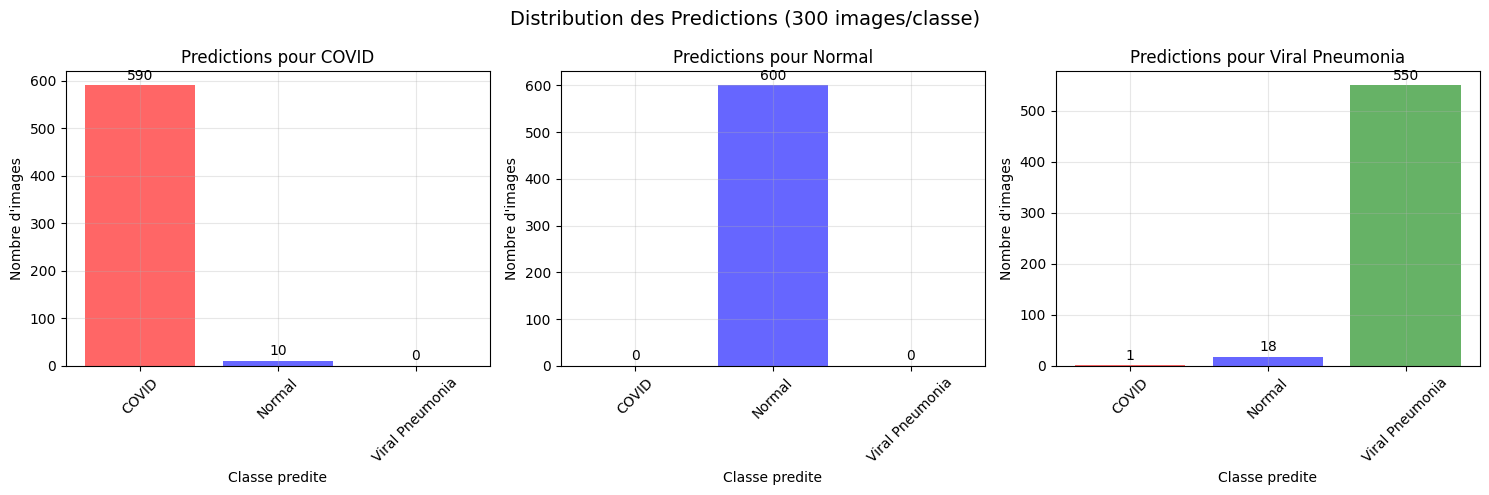

In [ ]:
plt.figure(figsize=(10, 8))
cm = confusion_matrix(all_true_labels, all_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=classes, yticklabels=classes)
plt.title(f'Matrice de Confusion ({MAX_SAMPLES} images/classe)')
plt.ylabel('Vraie etiquette')
plt.xlabel('Prediction')
plt.show()

# Graphique des accuracies par fold
plt.figure(figsize=(10, 6))
plt.bar(range(1, N_SPLITS+1), fold_results, color='skyblue', alpha=0.7)
plt.axhline(y=np.mean(fold_results), color='red', linestyle='--',
            linewidth=2, label=f'Moyenne: {np.mean(fold_results):.4f}')
plt.axhline(y=np.mean(fold_results) + np.std(fold_results), color='orange',
            linestyle=':', linewidth=1, alpha=0.5, label='+1 std')
plt.axhline(y=np.mean(fold_results) - np.std(fold_results), color='orange',
            linestyle=':', linewidth=1, alpha=0.5, label='-1 std')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title(f'Accuracy par Fold ({MAX_SAMPLES} images/classe)')
plt.ylim([0.85, 1.0])
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Distribution des prédictions par classe
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, class_name in enumerate(classes):
    class_indices = [j for j, label in enumerate(all_true_labels) if label == i]
    if class_indices:
        class_preds = [all_predictions[j] for j in class_indices]
        pred_counts = np.bincount(class_preds, minlength=3)

        axes[i].bar(range(3), pred_counts, color=['red', 'blue', 'green'], alpha=0.6)
        axes[i].set_title(f'Predictions pour {class_name}')
        axes[i].set_xlabel('Classe predite')
        axes[i].set_ylabel('Nombre d\'images')
        axes[i].set_xticks(range(3))
        axes[i].set_xticklabels(classes, rotation=45)
        axes[i].grid(True, alpha=0.3)

        # Ajouter les valeurs
        for j, count in enumerate(pred_counts):
            axes[i].text(j, count + max(pred_counts)*0.01, str(count),
                       ha='center', va='bottom')

plt.suptitle(f'Distribution des Predictions ({MAX_SAMPLES} images/classe)', fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
results = {
    'fold_accuracies': fold_results,
    'mean_accuracy': np.mean(fold_results),
    'std_accuracy': np.std(fold_results),
    'max_accuracy': np.max(fold_results),
    'min_accuracy': np.min(fold_results),
    'all_predictions': all_predictions,
    'all_true_labels': all_true_labels,
    'max_samples_per_class': MAX_SAMPLES,
    'total_images': len(all_paths),
    'class_distribution': np.bincount(all_labels).tolist()
}

save_path = f"/content/drive/MyDrive/COVID_XRay_Project/cross_validation_{MAX_SAMPLES}_results.pkl"
with open(save_path, 'wb') as f:
    pickle.dump(results, f)

# Sauvegarde CSV
results_df = pd.DataFrame({
    'fold': range(1, N_SPLITS+1),
    'accuracy': fold_results,
    'samples': [len(all_paths)//N_SPLITS]*N_SPLITS
})
csv_path = f"/content/drive/MyDrive/COVID_XRay_Project/cross_validation_{MAX_SAMPLES}_results.csv"
results_df.to_csv(csv_path, index=False)

print("Resultats sauvegardes :")
print("  -", save_path)
print("  -", csv_path)

# Résumé statistique
summary_stats = {
    'Dataset': f'{MAX_SAMPLES} images par classe',
    'Total images': len(all_paths),
    'Nombre de folds': N_SPLITS,
    'Moyenne accuracy': f"{np.mean(fold_results):.4f}",
    'Ecart-type': f"{np.std(fold_results):.4f}",
    'Intervalle de confiance (95%)': f"[{np.mean(fold_results)-1.96*np.std(fold_results):.4f}, {np.mean(fold_results)+1.96*np.std(fold_results):.4f}]"
}

print("\nStatistiques du test :")
for key, value in summary_stats.items():
    print(f"  {key}: {value}")

Resultats sauvegardes :
  - /content/drive/MyDrive/COVID_XRay_Project/cross_validation_300_results.pkl
  - /content/drive/MyDrive/COVID_XRay_Project/cross_validation_300_results.csv

Statistiques du test :
  Dataset: 300 images par classe
  Total images: 1769
  Nombre de folds: 5
  Moyenne accuracy: 0.9836
  Ecart-type: 0.0097
  Intervalle de confiance (95%): [0.9646, 1.0026]


MATRICES DE CONFUSION PAR FOLD

FOLD 1

Matrice de confusion (Fold 1):
Accuracy: 0.9915
Images: 354

               PREDICTION
          COVID  Normal  Viral
     ------------------------------
REEL COVID         119      1      0
REEL Normal          0    120      0
REEL Viral Pneumonia      0      2    112

Métriques par classe :
  COVID          : Precision=1.000, Recall=0.992, F1=0.996
  Normal         : Precision=0.976, Recall=1.000, F1=0.988
  Viral Pneumonia: Precision=1.000, Recall=0.982, F1=0.991

FOLD 2

Matrice de confusion (Fold 2):
Accuracy: 0.9661
Images: 354

               PREDICTION
          COVID  Normal  Viral
     ------------------------------
REEL COVID         116      4      0
REEL Normal          0    120      0
REEL Viral Pneumonia      0      8    106

Métriques par classe :
  COVID          : Precision=1.000, Recall=0.967, F1=0.983
  Normal         : Precision=0.909, Recall=1.000, F1=0.952
  Viral Pneumonia: Precision=1.000, Recall=0.930, F1=0.964

FOLD 3



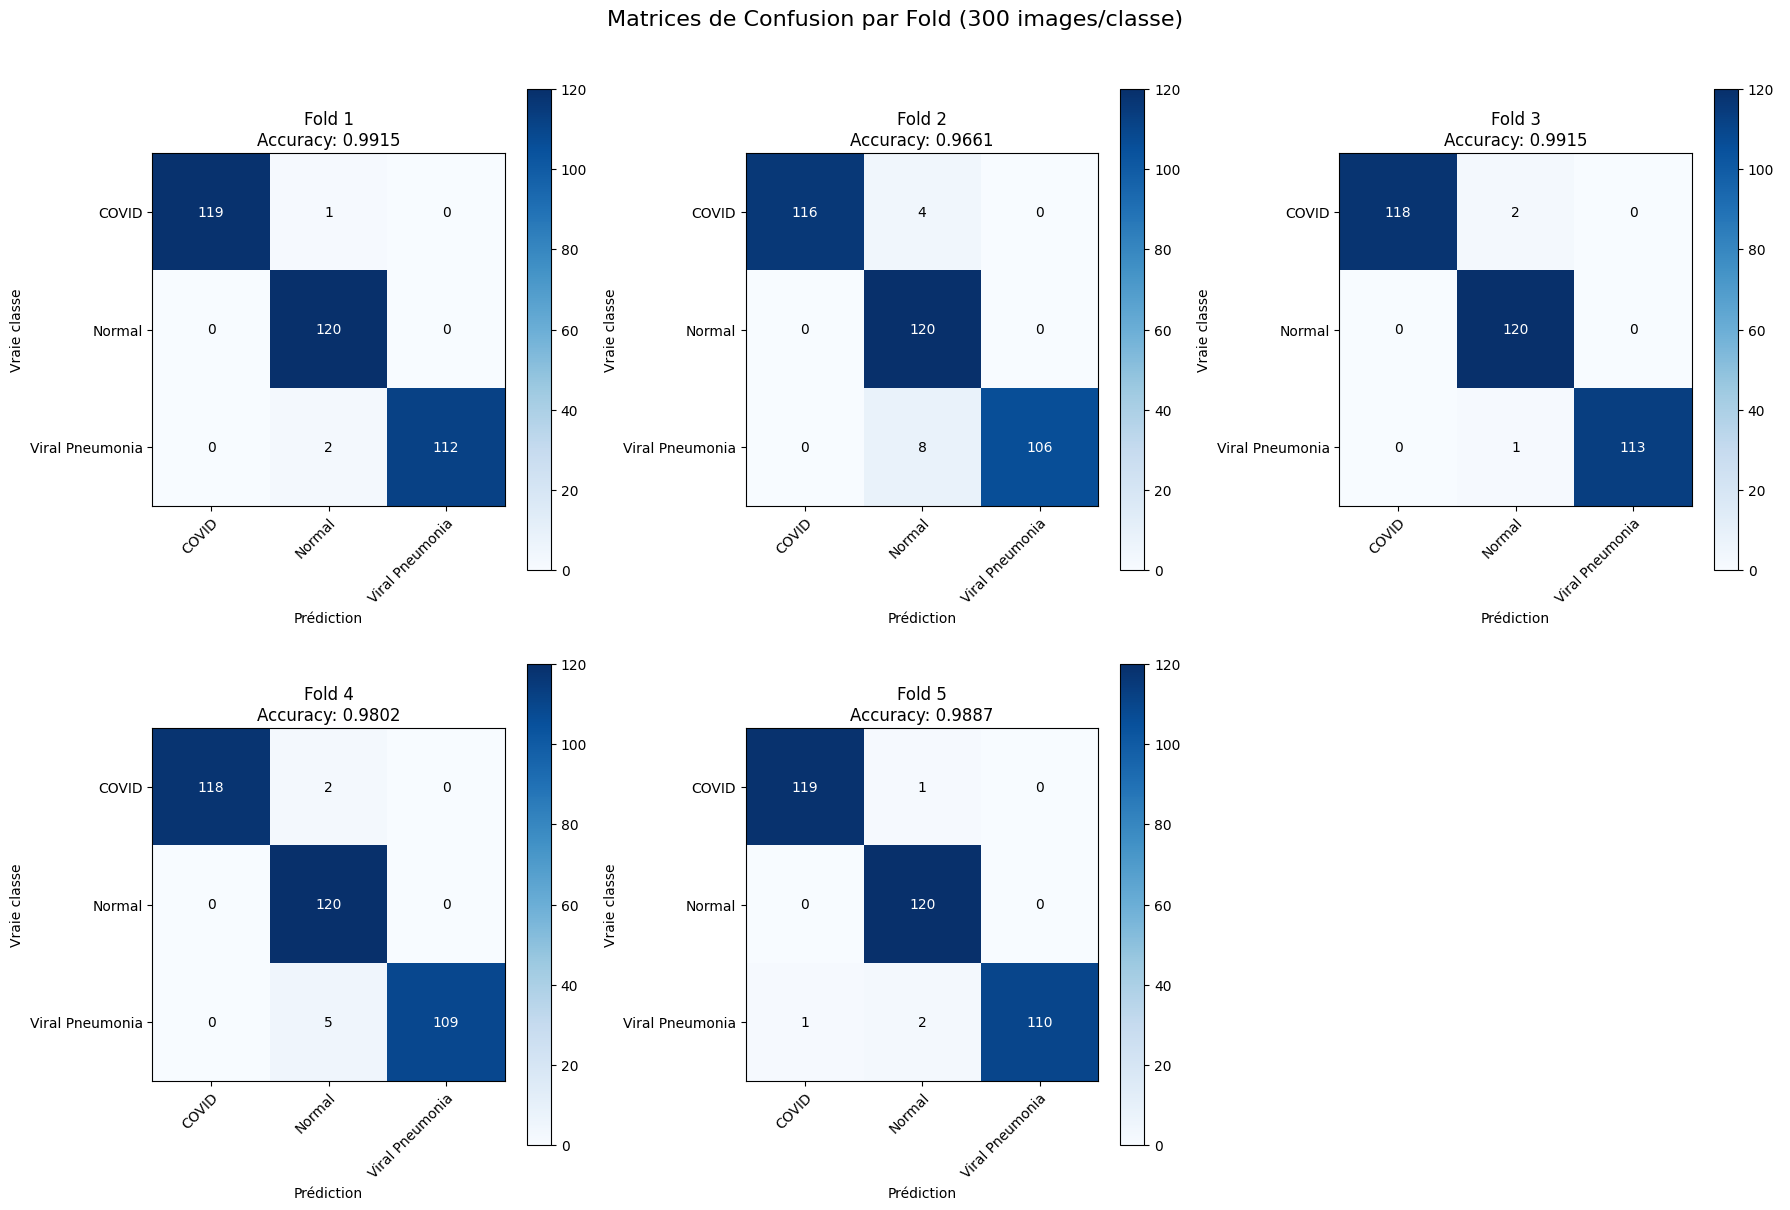


MATRICE DE CONFUSION GLOBALE (SOMME DES 5 FOLDS)

Pourcentages par cellule :
(ligne = vraie classe, colonne = prédiction)

               PREDICTION
          COVID  Normal  Viral  Total
     ----------------------------------------
REEL COVID       98.3%   1.7%   0.0%    600
REEL Normal       0.0% 100.0%   0.0%    600
REEL Viral Pneumonia   0.2%   3.2%  96.7%    569


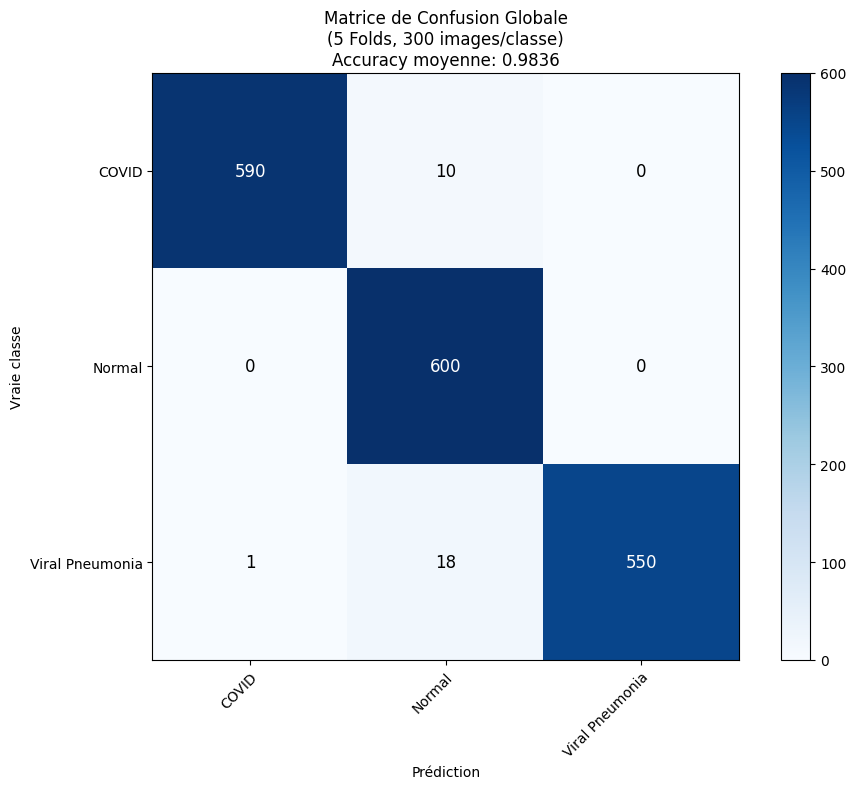


STATISTIQUES DETAILLEES PAR CLASSE

COVID:
------------------------------
  Vrais Positifs (TP): 590
  Faux Positifs (FP): 1
  Faux Négatifs (FN): 10
  Vrais Négatifs (TN): 1168
  Précision: 0.998
  Rappel (Recall): 0.983
  Spécificité: 0.999
  Score F1: 0.991
  Erreurs principales (confondu avec):
    • Viral Pneumonia: 1 images (0.2%)

Normal:
------------------------------
  Vrais Positifs (TP): 600
  Faux Positifs (FP): 28
  Faux Négatifs (FN): 0
  Vrais Négatifs (TN): 1141
  Précision: 0.955
  Rappel (Recall): 1.000
  Spécificité: 0.976
  Score F1: 0.977
  Erreurs principales (confondu avec):
    • COVID: 10 images (1.6%)
    • Viral Pneumonia: 18 images (2.9%)

Viral Pneumonia:
------------------------------
  Vrais Positifs (TP): 550
  Faux Positifs (FP): 0
  Faux Négatifs (FN): 19
  Vrais Négatifs (TN): 1200
  Précision: 1.000
  Rappel (Recall): 0.967
  Spécificité: 1.000
  Score F1: 0.983

✅ Matrices de confusion sauvegardées: /content/drive/MyDrive/COVID_XRay_Project/confusi

In [ ]:
# Refaire les folds pour obtenir les matrices de confusion détaillées
print("="*60)
print("MATRICES DE CONFUSION PAR FOLD")
print("="*60)

# Réinitialiser les données
all_paths = np.array(all_paths)
all_labels = np.array(all_labels)

# Recréer les folds
skf = StratifiedKFold(n_splits=N_SPLITS, shuffle=True, random_state=42)

# Stocker les matrices de confusion pour chaque fold
fold_cms = []

for fold, (train_idx, val_idx) in enumerate(skf.split(all_paths, all_labels)):
    print(f"\n{'='*50}")
    print(f"FOLD {fold + 1}")
    print(f"{'='*50}")

    X_val = all_paths[val_idx]
    y_val = all_labels[val_idx]

    predictions = []

    for i, img_path in enumerate(X_val):
        img = load_img(img_path, target_size=IMG_SIZE)
        img_array = img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = tf.keras.applications.resnet50.preprocess_input(img_array)

        pred = model.predict(img_array, verbose=0)
        predictions.append(np.argmax(pred[0]))

    # Calculer la matrice de confusion
    cm = confusion_matrix(y_val, predictions, labels=[0, 1, 2])
    fold_cms.append(cm)

    # Afficher la matrice de confusion
    print(f"\nMatrice de confusion (Fold {fold + 1}):")
    print(f"Accuracy: {accuracy_score(y_val, predictions):.4f}")
    print(f"Images: {len(X_val)}")
    print("\n" + " " * 15 + "PREDICTION")
    print(" " * 10 + "COVID  Normal  Viral")
    print(" " * 5 + "-" * 30)

    for i, class_name in enumerate(classes):
        row = f"{class_name:10}"
        for j in range(3):
            row += f"{cm[i, j]:7}"
        print(f"REEL {row}")

    # Calculer les métriques par classe
    print("\nMétriques par classe :")
    for i, class_name in enumerate(classes):
        tp = cm[i, i]
        fp = sum(cm[:, i]) - tp
        fn = sum(cm[i, :]) - tp
        tn = sum(sum(cm)) - tp - fp - fn

        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

        print(f"  {class_name:15}: Precision={precision:.3f}, Recall={recall:.3f}, F1={f1:.3f}")

# Visualisation de toutes les matrices de confusion
print("\n" + "="*60)
print("VISUALISATION DES MATRICES DE CONFUSION")
print("="*60)

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for fold in range(N_SPLITS):
    ax = axes[fold]
    cm = fold_cms[fold]

    # Créer le heatmap
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)

    # Ajouter les annotations
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes,
           yticklabels=classes,
           title=f'Fold {fold + 1}\nAccuracy: {fold_results[fold]:.4f}',
           ylabel='Vraie classe',
           xlabel='Prédiction')

    # Rotation des labels
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    # Ajouter les nombres dans les cellules
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], 'd'),
                   ha="center", va="center",
                   color="white" if cm[i, j] > thresh else "black")

# Cacher le dernier subplot si nécessaire
axes[-1].axis('off')

plt.suptitle(f'Matrices de Confusion par Fold ({MAX_SAMPLES} images/classe)', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

# Matrice de confusion agrégée (somme de tous les folds)
print("\n" + "="*60)
print("MATRICE DE CONFUSION GLOBALE (SOMME DES 5 FOLDS)")
print("="*60)

global_cm = np.sum(fold_cms, axis=0)

fig, ax = plt.subplots(figsize=(10, 8))
im = ax.imshow(global_cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)

ax.set(xticks=np.arange(global_cm.shape[1]),
       yticks=np.arange(global_cm.shape[0]),
       xticklabels=classes,
       yticklabels=classes,
       title=f'Matrice de Confusion Globale\n(5 Folds, {MAX_SAMPLES} images/classe)\nAccuracy moyenne: {np.mean(fold_results):.4f}',
       ylabel='Vraie classe',
       xlabel='Prédiction')

plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Ajouter les nombres
thresh = global_cm.max() / 2.
for i in range(global_cm.shape[0]):
    for j in range(global_cm.shape[1]):
        ax.text(j, i, format(global_cm[i, j], 'd'),
               ha="center", va="center",
               color="white" if global_cm[i, j] > thresh else "black",
               fontsize=12)

# Ajouter les pourcentages
print("\nPourcentages par cellule :")
print("(ligne = vraie classe, colonne = prédiction)")
print("\n" + " " * 15 + "PREDICTION")
print(" " * 10 + "COVID  Normal  Viral  Total")
print(" " * 5 + "-" * 40)

for i in range(3):
    row_total = sum(global_cm[i, :])
    row = f"{classes[i]:10}"
    for j in range(3):
        percentage = (global_cm[i, j] / row_total * 100) if row_total > 0 else 0
        row += f"{percentage:6.1f}%"
    row += f"  {row_total:5}"
    print(f"REEL {row}")

plt.tight_layout()
plt.show()

# Statistiques détaillées par classe
print("\n" + "="*60)
print("STATISTIQUES DETAILLEES PAR CLASSE")
print("="*60)

for i, class_name in enumerate(classes):
    print(f"\n{class_name}:")
    print("-" * 30)

    tp = global_cm[i, i]
    fp = sum(global_cm[:, i]) - tp
    fn = sum(global_cm[i, :]) - tp
    tn = sum(sum(global_cm)) - tp - fp - fn

    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

    print(f"  Vrais Positifs (TP): {tp}")
    print(f"  Faux Positifs (FP): {fp}")
    print(f"  Faux Négatifs (FN): {fn}")
    print(f"  Vrais Négatifs (TN): {tn}")
    print(f"  Précision: {precision:.3f}")
    print(f"  Rappel (Recall): {recall:.3f}")
    print(f"  Spécificité: {specificity:.3f}")
    print(f"  Score F1: {f1:.3f}")

    # Erreurs principales
    if fp > 0:
        print(f"  Erreurs principales (confondu avec):")
        for j in range(3):
            if j != i and global_cm[j, i] > 0:
                percentage = global_cm[j, i] / sum(global_cm[:, i]) * 100
                print(f"    • {classes[j]}: {global_cm[j, i]} images ({percentage:.1f}%)")

# Sauvegarder les matrices de confusion
confusion_data = {
    'fold_confusion_matrices': fold_cms,
    'global_confusion_matrix': global_cm,
    'classes': classes,
    'fold_accuracies': fold_results,
    'max_samples': MAX_SAMPLES
}

confusion_path = f"/content/drive/MyDrive/COVID_XRay_Project/confusion_matrices_{MAX_SAMPLES}.pkl"
with open(confusion_path, 'wb') as f:
    pickle.dump(confusion_data, f)

print(f"\n✅ Matrices de confusion sauvegardées: {confusion_path}")